<a href="https://www.analytiksinc.com">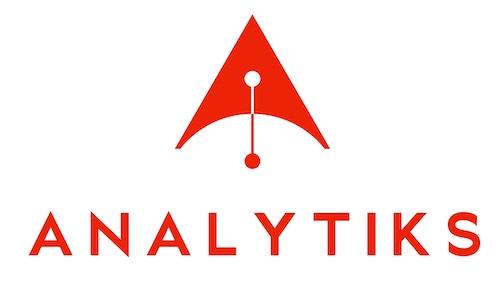</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

# REGRESSION FOR MEDICAL INSURANCE COST

<b>Dataset:</b> <i>insurance.csv</i>

<b>Features</b><br>
<ul>
    <li>age: age of primary beneficiary</li>
    <li>sex: insurance contractor gender, female, male </li>
    <li>bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
    height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 </li>
    <li>children: Number of children covered by health insurance / Number of dependents</li>
    <li>smoker: Smoking</li>
    <li>region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.</li>
    <li>charges: Individual medical costs billed by health insurance</li>
</ul>

<b>Objectives</b>
<ul>
    <li> Load and Explore the Dataset </li>
    <li> Build model using Linear Regression, Lasso Regression, and Ridge Regression </li>
    <li> Create a table of results to compare the three models </li>

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Additional Libraries

In [2]:
#Train-Test Split
from sklearn.model_selection import train_test_split

#Linear Regression Algorithm from sklearn (Linear, Lasso, and Ridge Regression)
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Metrics to measure model performance (r2, mae, and mse)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Load and Explore the Dataset

In [3]:
#Load the insurance.csv dataset
df = pd.read_csv('../Datasets/insurance.csv')

In [4]:
#Check the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Describe the dataset (numeric values)
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#Describe the dataset (categorical values)
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
df_num = df.select_dtypes(exclude='object')
df_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [8]:
# df_num = df[['col_name1', 'col_name2','col_name3']]

In [9]:
#Keep only the numeric features for analysis and regression

In [10]:
#Get the correlation of the attributes
corrmat = df_num.corr()
corrmat

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


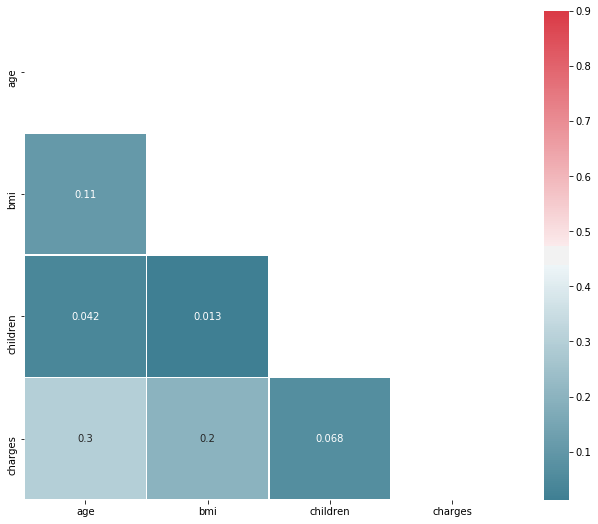

In [11]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax, annot=True)

## Build the Model

In [12]:
#Set the features and the target, the target variable will be 'charges'

In [13]:
#Split into train and test set (test_size=0.30, and random_state=30)

df_train, df_test = train_test_split(df_num, test_size=0.30, random_state=30)

x_train = df_train[['age', 'bmi']]
y_train = df_train[['charges']]

x_test = df_test[['age', 'bmi']]
y_test = df_test[['charges']]

In [14]:
#Verify if split was done correctly
display(x_train, y_train)
display(x_test, y_test)

,age,bmi
1077,21,26.03
61,25,33.66
796,30,44.22
1061,57,27.94
69,28,23.98
...,...,...
919,35,34.21
1164,41,28.31
500,29,34.40
941,50,46.09


,charges
1077,2102.2647
61,4504.6624
796,4266.1658
1061,11554.2236
69,17663.1442
...,...
919,5245.2269
1164,7153.5539
500,36197.6990
941,9549.5651


,age,bmi
338,50,32.300
620,30,31.400
965,35,27.100
128,32,17.765
329,52,36.700
...,...,...
659,57,28.785
893,47,38.940
584,19,20.700
1290,38,19.950


,charges
338,41919.09700
620,3659.34600
965,4746.34400
128,32734.18630
329,9144.56500
...,...
659,14394.39815
893,44202.65360
584,1242.81600
1290,7133.90250


### Linear Regression

In [15]:
#Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

#Train the Model
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#Predict on the test set
linreg_pred = linreg.predict(x_test)

### Lasso

In [17]:
#Instantiate the Lasso Regression Algorithm (alpha=0.5, random_state=30)
lasso = Lasso(alpha=0.5, normalize=True, random_state=30)

#Train the Model
lasso.fit(x_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=30, selection='cyclic',
      tol=0.0001, warm_start=False)

In [18]:
#Predict on the test set
lasso_pred = lasso.predict(x_test)

### Ridge

In [19]:
#Instantiate the Ridge Regression Algorithm (alpha=0.5, random_state=30)
ridge = Ridge(alpha=0.5, normalize=True, random_state=30)

#Train the Model
ridge.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=30, solver='auto', tol=0.001)

In [20]:
#Predict on the test set
ridge_pred = ridge.predict(x_test)

## Table of Results

In [21]:
#Create dataframe for results
#index must be the algorithms
#columns will be the metrics r2, mae, and mse

algorithms = ['linear','lasso','ridge']
metrics = ['r2','mae','mse']
r2 = [r2_score(y_test,linreg_pred), r2_score(y_test,lasso_pred), r2_score(y_test,ridge_pred)]
mae = [mean_absolute_error(y_test,linreg_pred),mean_absolute_error(y_test,lasso_pred),mean_absolute_error(y_test,ridge_pred)]
mse = [mean_squared_error(y_test,linreg_pred),mean_squared_error(y_test,lasso_pred),mean_squared_error(y_test,ridge_pred)] 

results_df = pd.DataFrame(index=algorithms, columns=metrics)
results_df.r2 = r2
results_df.mae = mae
results_df.mse = mse

In [22]:
#Display the results dataframe
results_df

,r2,mae,mse
linear,0.112141,8970.188031,1.286759e+08
lasso,0.112119,8969.966176,1.286792e+08
ridge,0.102570,8919.223359,1.300630e+08


In [23]:
#Create dataframe for coefficients
#index must be the algorithms
#columns will be the features
#values will be the coefficients
features = x_train.columns
coef = [linreg.coef_.reshape(-1,), lasso.coef_.reshape(-1,), ridge.coef_.reshape(-1,)]

coef_df = pd.DataFrame(coef, index = algorithms, columns=features)

In [24]:
#Display the coefficient dataframe
coef_df

,age,bmi
linear,251.046814,307.450611
lasso,250.063086,305.181777
ridge,169.958698,217.391239


## Visualizations

In [25]:
x_jittered = x_test['bmi'] + np.random.normal(0,0.3, len(x_test))

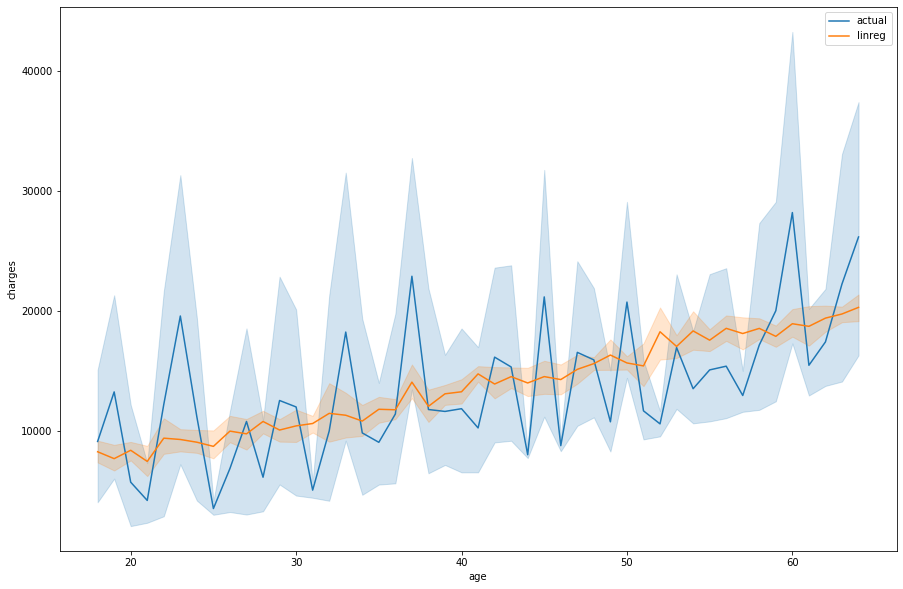

In [26]:
fig = plt.figure(figsize=(15,10))

sns.lineplot(x_test['age'], y_test.values.reshape(-1,), label='actual')
sns.lineplot(x_test['age'], linreg_pred.reshape(-1,), label='linreg')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()

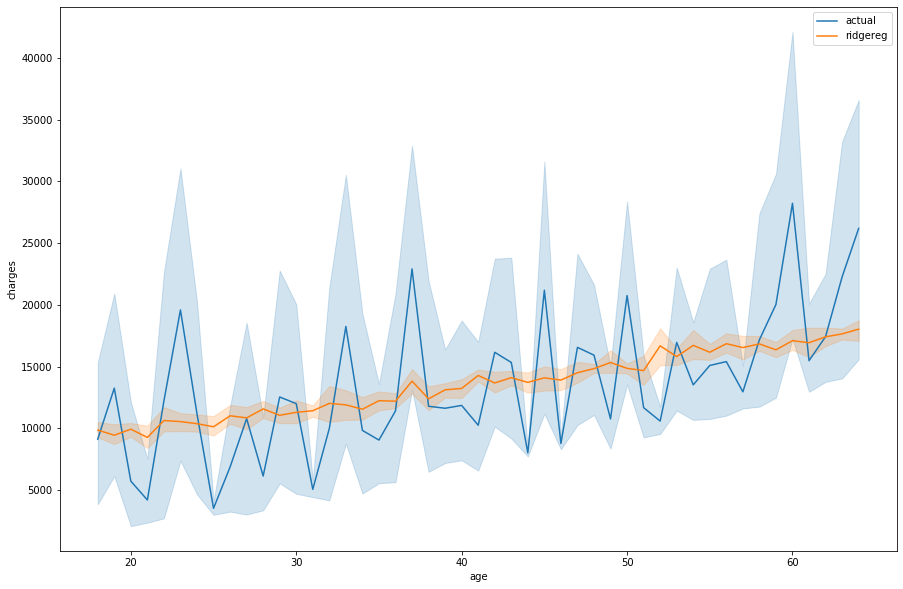

In [27]:
fig = plt.figure(figsize=(15,10))

sns.lineplot(x_test['age'], y_test.values.reshape(-1,), label='actual')
sns.lineplot(x_test['age'], ridge_pred.reshape(-1,), label='ridgereg')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()

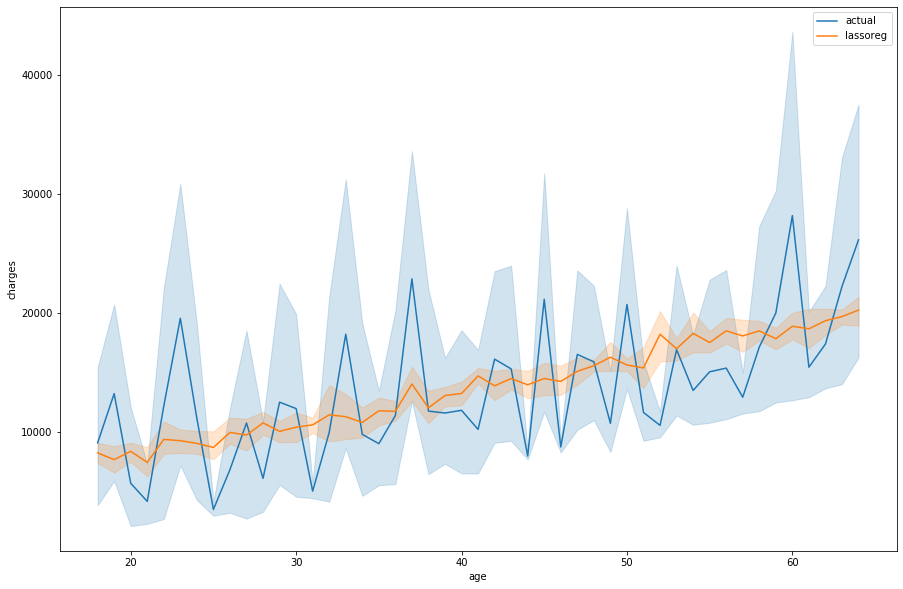

In [28]:
fig = plt.figure(figsize=(15,10))

sns.lineplot(x_test['age'], y_test.values.reshape(-1,), label='actual')
sns.lineplot(x_test['age'], lasso_pred.reshape(-1,), label='lassoreg')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()